## International Football Win Prediction

Given *data about women's football games*, let's try to predict whether the home team of a given game will **win** or not.

We will use a TensorFlow neural network to make our predictions.

Data source: https://www.kaggle.com/datasets/martj42/womens-international-football-results

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
data = pd.read_csv('archive/results.csv')
data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1956-09-23,Germany,Netherlands,2,1,Friendly,Essen,Germany,False
1,1957-07-28,Germany,England,1,1,Friendly,Stuttgart,Germany,False
2,1957-10-13,Germany,Netherlands,2,0,Friendly,Berlin,Germany,False
3,1957-11-03,Netherlands,Austria,8,1,European Championship,Berlin,Germany,True
4,1957-11-03,Germany,England,0,4,European Championship,Berlin,Germany,False
...,...,...,...,...,...,...,...,...,...
10570,2025-08-12,Vietnam,Thailand,1,0,ASEAN Championship,Haiphong,Vietnam,False
10571,2025-08-12,Indonesia,Cambodia,1,1,ASEAN Championship,Phú Thọ,Vietnam,True
10572,2025-08-13,Philippines,Myanmar,1,1,ASEAN Championship,Haiphong,Vietnam,True
10573,2025-08-16,Myanmar,Thailand,2,1,ASEAN Championship,Haiphong,Vietnam,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10575 entries, 0 to 10574
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        10575 non-null  object
 1   home_team   10575 non-null  object
 2   away_team   10575 non-null  object
 3   home_score  10575 non-null  int64 
 4   away_score  10575 non-null  int64 
 5   tournament  10575 non-null  object
 6   city        10575 non-null  object
 7   country     10575 non-null  object
 8   neutral     10575 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 671.4+ KB


### Feature Engineering + Target Creation

In [27]:
df = data.copy()

In [28]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1956-09-23,Germany,Netherlands,2,1,Friendly,Essen,Germany,False
1,1957-07-28,Germany,England,1,1,Friendly,Stuttgart,Germany,False
2,1957-10-13,Germany,Netherlands,2,0,Friendly,Berlin,Germany,False
3,1957-11-03,Netherlands,Austria,8,1,European Championship,Berlin,Germany,True
4,1957-11-03,Germany,England,0,4,European Championship,Berlin,Germany,False
...,...,...,...,...,...,...,...,...,...
10570,2025-08-12,Vietnam,Thailand,1,0,ASEAN Championship,Haiphong,Vietnam,False
10571,2025-08-12,Indonesia,Cambodia,1,1,ASEAN Championship,Phú Thọ,Vietnam,True
10572,2025-08-13,Philippines,Myanmar,1,1,ASEAN Championship,Haiphong,Vietnam,True
10573,2025-08-16,Myanmar,Thailand,2,1,ASEAN Championship,Haiphong,Vietnam,True


In [29]:
df['date']

0        1956-09-23
1        1957-07-28
2        1957-10-13
3        1957-11-03
4        1957-11-03
            ...    
10570    2025-08-12
10571    2025-08-12
10572    2025-08-13
10573    2025-08-16
10574    2025-08-19
Name: date, Length: 10575, dtype: object

In [30]:
df['year'] = df['date'].apply(lambda x: x[0:4])
df['month'] = df['date'].apply(lambda x: x[5:7])

df = df.drop('date', axis=1)

In [31]:
df

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,Germany,Netherlands,2,1,Friendly,Essen,Germany,False,1956,09
1,Germany,England,1,1,Friendly,Stuttgart,Germany,False,1957,07
2,Germany,Netherlands,2,0,Friendly,Berlin,Germany,False,1957,10
3,Netherlands,Austria,8,1,European Championship,Berlin,Germany,True,1957,11
4,Germany,England,0,4,European Championship,Berlin,Germany,False,1957,11
...,...,...,...,...,...,...,...,...,...,...
10570,Vietnam,Thailand,1,0,ASEAN Championship,Haiphong,Vietnam,False,2025,08
10571,Indonesia,Cambodia,1,1,ASEAN Championship,Phú Thọ,Vietnam,True,2025,08
10572,Philippines,Myanmar,1,1,ASEAN Championship,Haiphong,Vietnam,True,2025,08
10573,Myanmar,Thailand,2,1,ASEAN Championship,Haiphong,Vietnam,True,2025,08


In [32]:
df['home_victory'] = (df['home_score'] > df['away_score']).astype(int)
df = df.drop(['home_score', 'away_score'], axis=1)

In [33]:
df

,home_team,away_team,tournament,city,country,neutral,year,month,home_victory
0,Germany,Netherlands,Friendly,Essen,Germany,False,1956,09,1
1,Germany,England,Friendly,Stuttgart,Germany,False,1957,07,0
2,Germany,Netherlands,Friendly,Berlin,Germany,False,1957,10,1
3,Netherlands,Austria,European Championship,Berlin,Germany,True,1957,11,1
4,Germany,England,European Championship,Berlin,Germany,False,1957,11,0
...,...,...,...,...,...,...,...,...,...
10570,Vietnam,Thailand,ASEAN Championship,Haiphong,Vietnam,False,2025,08,1
10571,Indonesia,Cambodia,ASEAN Championship,Phú Thọ,Vietnam,True,2025,08,0
10572,Philippines,Myanmar,ASEAN Championship,Haiphong,Vietnam,True,2025,08,0
10573,Myanmar,Thailand,ASEAN Championship,Haiphong,Vietnam,True,2025,08,1


In [34]:
df['neutral'] = df['neutral'].astype(int)

In [35]:
df

,home_team,away_team,tournament,city,country,neutral,year,month,home_victory
0,Germany,Netherlands,Friendly,Essen,Germany,0,1956,09,1
1,Germany,England,Friendly,Stuttgart,Germany,0,1957,07,0
2,Germany,Netherlands,Friendly,Berlin,Germany,0,1957,10,1
3,Netherlands,Austria,European Championship,Berlin,Germany,1,1957,11,1
4,Germany,England,European Championship,Berlin,Germany,0,1957,11,0
...,...,...,...,...,...,...,...,...,...
10570,Vietnam,Thailand,ASEAN Championship,Haiphong,Vietnam,0,2025,08,1
10571,Indonesia,Cambodia,ASEAN Championship,Phú Thọ,Vietnam,1,2025,08,0
10572,Philippines,Myanmar,ASEAN Championship,Haiphong,Vietnam,1,2025,08,0
10573,Myanmar,Thailand,ASEAN Championship,Haiphong,Vietnam,1,2025,08,1


In [37]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'home_team': 244,
 'away_team': 241,
 'tournament': 109,
 'city': 1724,
 'country': 205,
 'year': 58,
 'month': 12}

#### Encoding

In [40]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix, dtype=int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [41]:
nominal_features = ['home_team', 'away_team', 'tournament', 'city', 'country']
prefixes = ['ht', 'at', 'tour', 'ct', 'ct']

df = onehot_encode(df, nominal_features, prefixes)

In [42]:
df

,neutral,year,month,home_victory,ht_Afghanistan,ht_Albania,ht_Algeria,ht_American Samoa,ht_Andorra,ht_Angola,...,ct_United Arab Emirates,ct_United States,ct_United States Virgin Islands,ct_Uruguay,ct_Uzbekistan,ct_Venezuela,ct_Vietnam,ct_Wales,ct_Zambia,ct_Zimbabwe
0,0,1956,09,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1957,07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1957,10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1957,11,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1957,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10570,0,2025,08,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10571,1,2025,08,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10572,1,2025,08,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10573,1,2025,08,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Splitting and Scaling

In [43]:
y = df['home_victory'].copy()
X = df.drop('home_victory', axis=1).copy()

In [44]:
# Scale X
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,neutral,year,month,ht_Afghanistan,ht_Albania,ht_Algeria,ht_American Samoa,ht_Andorra,ht_Angola,ht_Anguilla,...,ct_United Arab Emirates,ct_United States,ct_United States Virgin Islands,ct_Uruguay,ct_Uzbekistan,ct_Venezuela,ct_Vietnam,ct_Wales,ct_Zambia,ct_Zimbabwe
0,-0.865500,-5.212130,0.699865,-0.016845,-0.060053,-0.063146,-0.023826,-0.032269,-0.038927,-0.023826,...,-0.065372,-0.221131,-0.021749,-0.023826,-0.066815,-0.045659,-0.127055,-0.086756,-0.047693,-0.072306
1,-0.865500,-5.119342,0.066428,-0.016845,-0.060053,-0.063146,-0.023826,-0.032269,-0.038927,-0.023826,...,-0.065372,-0.221131,-0.021749,-0.023826,-0.066815,-0.045659,-0.127055,-0.086756,-0.047693,-0.072306
2,-0.865500,-5.119342,1.016583,-0.016845,-0.060053,-0.063146,-0.023826,-0.032269,-0.038927,-0.023826,...,-0.065372,-0.221131,-0.021749,-0.023826,-0.066815,-0.045659,-0.127055,-0.086756,-0.047693,-0.072306
3,1.155401,-5.119342,1.333301,-0.016845,-0.060053,-0.063146,-0.023826,-0.032269,-0.038927,-0.023826,...,-0.065372,-0.221131,-0.021749,-0.023826,-0.066815,-0.045659,-0.127055,-0.086756,-0.047693,-0.072306
4,-0.865500,-5.119342,1.333301,-0.016845,-0.060053,-0.063146,-0.023826,-0.032269,-0.038927,-0.023826,...,-0.065372,-0.221131,-0.021749,-0.023826,-0.066815,-0.045659,-0.127055,-0.086756,-0.047693,-0.072306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10570,-0.865500,1.190239,0.383147,-0.016845,-0.060053,-0.063146,-0.023826,-0.032269,-0.038927,-0.023826,...,-0.065372,-0.221131,-0.021749,-0.023826,-0.066815,-0.045659,7.870605,-0.086756,-0.047693,-0.072306
10571,1.155401,1.190239,0.383147,-0.016845,-0.060053,-0.063146,-0.023826,-0.032269,-0.038927,-0.023826,...,-0.065372,-0.221131,-0.021749,-0.023826,-0.066815,-0.045659,7.870605,-0.086756,-0.047693,-0.072306
10572,1.155401,1.190239,0.383147,-0.016845,-0.060053,-0.063146,-0.023826,-0.032269,-0.038927,-0.023826,...,-0.065372,-0.221131,-0.021749,-0.023826,-0.066815,-0.045659,7.870605,-0.086756,-0.047693,-0.072306
10573,1.155401,1.190239,0.383147,-0.016845,-0.060053,-0.063146,-0.023826,-0.032269,-0.038927,-0.023826,...,-0.065372,-0.221131,-0.021749,-0.023826,-0.066815,-0.045659,7.870605,-0.086756,-0.047693,-0.072306


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=67)

### Training

In [46]:
X.shape

(10575, 2526)

In [47]:
y.mean()

np.float64(0.5218912529550828)

In [58]:
inputs = tf.keras.Input(shape=(2526, ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

epochs = 25
batch_size = 32

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/25


2025-10-14 22:36:43.462127: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 59825784 exceeds 10% of free system memory.


186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5678 - auc: 0.5908 - loss: 0.6995 - val_accuracy: 0.6084 - val_auc: 0.6453 - val_loss: 0.6664 - learning_rate: 0.0010
Epoch 2/25
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7693 - auc: 0.8523 - loss: 0.4794 - val_accuracy: 0.6226 - val_auc: 0.6728 - val_loss: 0.7101 - learning_rate: 0.0010
Epoch 3/25
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8211 - auc: 0.9126 - loss: 0.3729 - val_accuracy: 0.6502 - val_auc: 0.6913 - val_loss: 0.7724 - learning_rate: 0.0010
Epoch 4/25
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8711 - auc: 0.9465 - loss: 0.2985 - val_accuracy: 0.6705 - val_auc: 0.7089 - val_loss: 0.8237 - learning_rate: 0.0010
Epoch 5/25
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8951 - auc: 0.9653 - loss: 0.2411 - val_accuracy: 0.6556 - val_auc: 0.7118 - val_loss: 0.8946 - learning_rate: 0.0010
Epoch 6/25
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9221 - auc: 0.9797 - loss

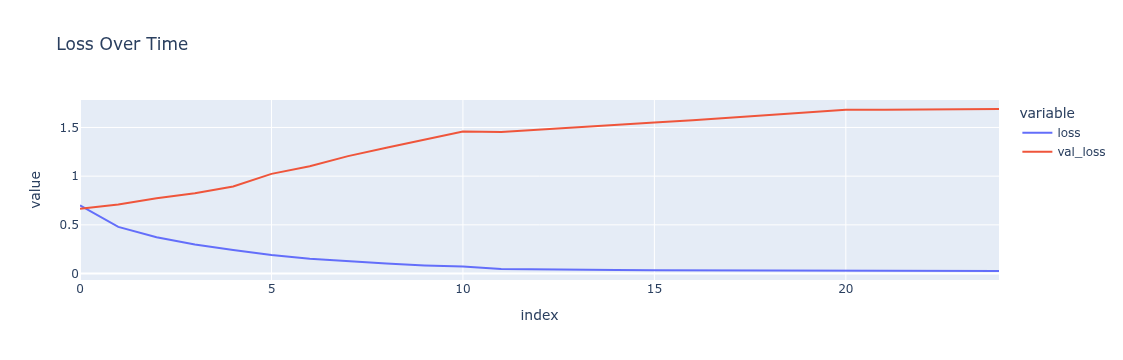

In [59]:
fig = px.line(
    history.history,
    y = ['loss', 'val_loss'],
    labels = {'x': 'Epoch', 'y': 'Loss'},
    title = 'Loss Over Time'
)
fig.show()

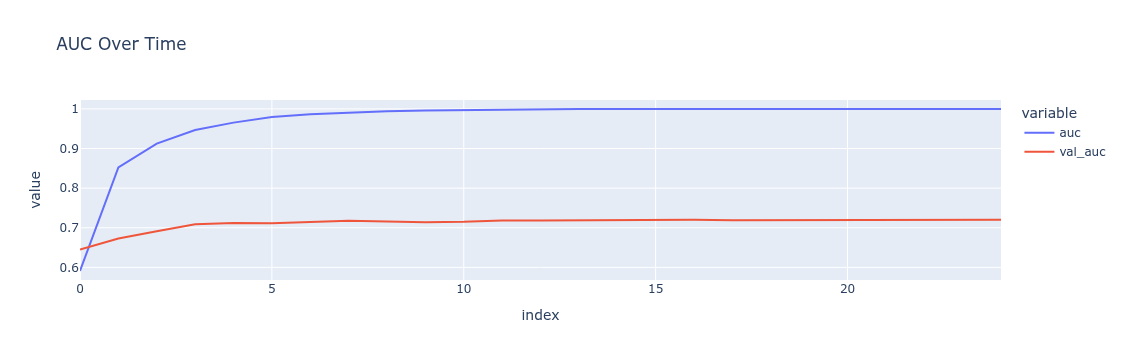

In [60]:
fig = px.line(
    history.history,
    y = ['auc', 'val_auc'],
    labels = {'x': 'Epoch', 'y': 'AUC'},
    title = 'AUC Over Time'
)
fig.show()

In [61]:
model.evaluate(X_test, y_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6713 - auc: 0.7168 - loss: 1.6759


[1.6759188175201416, 0.6712890267372131, 0.7168276309967041]

In [62]:
np.argmax(history.history['val_auc'])

np.int64(19)